In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Algorytm znajdujacy centrum grafu

### Diameter
d - shortest distance between $v_i$, $v_j$
Diameter is the gratest between all d values.

### Eccentricy

Eccentricy of a node is the maximum distance between a node and another node.

### Radius

Radius of a graph is the minimal between all eccentricies in graph.


In [3]:
def floydWarshall(matrix):
    n = len(matrix) # Number of nodes
    eccenticity = np.zeros(n)
    d = matrix.copy()

    # Algorytm Floyd'a Warshall'a
    for k in range(n):
        for j in range(n):
            for i in range(n):
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    
    # Szukanie eccentricity
    for i in range(n):
        for j in range(n):
            eccenticity[i] = max(eccenticity[i], d[i][j])
    
    rad = min(eccenticity)
    diam = max(eccenticity)
    center = []
    
    for i, el in enumerate(eccenticity):
        if el == rad:
            center.append(i)
    
    return diam, center, rad


In [8]:
G = nx.balanced_tree(2, 7)
M = nx.to_numpy_array(G)

weights = np.random.randint(1, 4, M.shape)
weights = weights @ weights.T

M = np.multiply(M, weights)

diam, center, rad = floydWarshall(M)

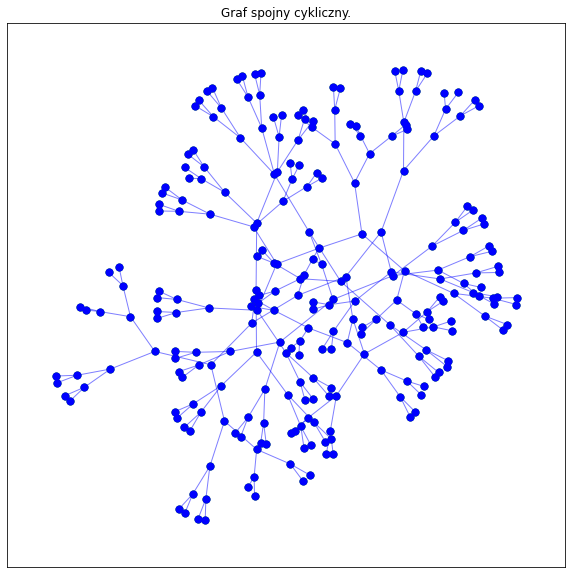

In [9]:
fig = plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='g', node_size=50)
nx.draw_networkx_nodes(G, pos, nodelist=center, node_color='b', node_size=50)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

# labels = {i: str(i) for i in range(1, 5)}
# nx.draw_networkx_labels(G, pos, labels=labels, font_size=16)
# nx.draw_networkx_edge_labels(G, pos)

plt.title("Graf spojny cykliczny.")
plt.show()